# 데이터 불러오기

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


df = pd.read_csv("Ecommerce_Customers.csv")

In [179]:
#데이터 확인
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# 데이터 셋 분리

In [190]:
#독립변수, 종속변수 설정
#Train 데이터, Test 데이터 분리

x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

y = df[['Yearly Amount Spent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 7)

# 독립변수, 종속변수 상관관계 확인

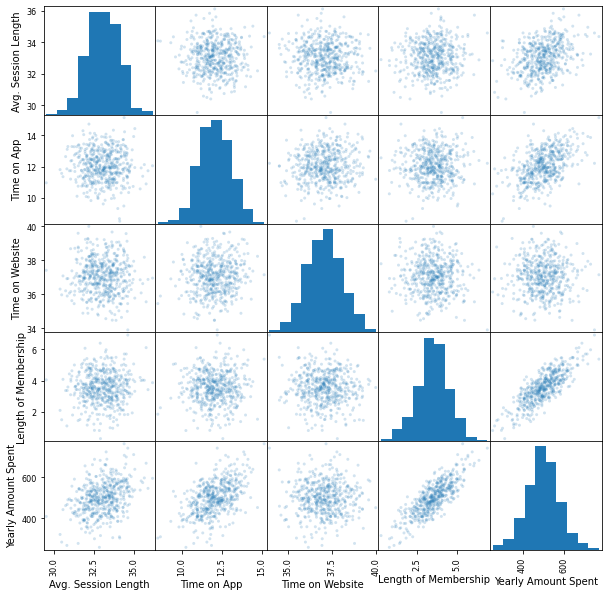

In [191]:
#선형 패턴 확인
#극단값 확인

pd.plotting.scatter_matrix(df, alpha = 0.2, figsize = (10,10))
plt.show()

# 모델 생성하기

In [192]:
# Simple linear regression - sklearn

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [193]:
#회귀계수 확인
#상수 확인

print('회귀계수 값:', mlr.coef_)
print('상수 값:', mlr.intercept_)

회귀계수 값: [[25.39917835 38.38819974  0.79401764 61.81196097]]
상수 값: [-1050.61894257]


#### Yearly Amount Spent = - 1050.6 + 25.4 Avg. Session Length + 38.4 Time on App + 0.8 Time on Website + 61.8 Length of Membership

# 다중공선성 문제 확인

In [194]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

In [195]:
vif

,VIF Factor,features
0,613.185924,Avg. Session Length
1,144.019714,Time on App
2,658.495572,Time on Website
3,13.578801,Length of Membership


#### 다중공선성 문제가 심하기 때문에, Length of Membership 만 사용하기로  결정

In [212]:
# 독립변수 재설정 
x = df[['Length of Membership']]
y = df[['Yearly Amount Spent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 77)

# 모델 재적합
mlr = LinearRegression()
mlr.fit(x_train, y_train)


LinearRegression()

In [213]:
#회귀계수 확인
#상수 확인

print('회귀계수 값:', mlr.coef_)
print('상수 값:', mlr.intercept_)

회귀계수 값: [[63.52450995]]
상수 값: [273.74001598]


#### Yearly Amount Spent = 273.7 +  63.5 Length of Membership

# 잔차분석

#### 불편성, 독립성, 등분산성, 정규성 확인

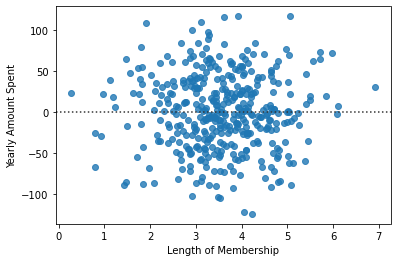

In [214]:
# 잔차도 그리기

sns.residplot(x_train, y_train)
plt.show()

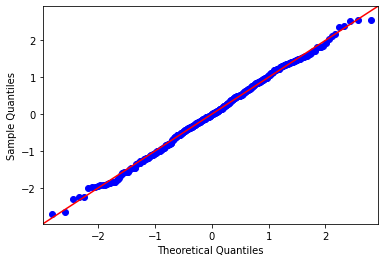

In [215]:
#Normal Q-Q plot

# 잔차 구하기
y_train_predict = mlr.predict(x_train)
residual = y_train - y_train_predict

# q-q plot 그리기
sm.qqplot(residual['Yearly Amount Spent'], line = '45', fit = True)
plt.show()

# 모델 평가

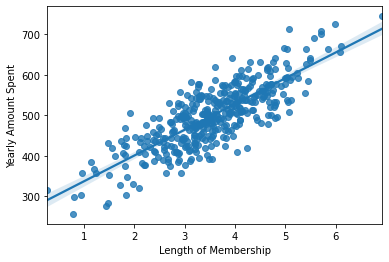

In [216]:
sns.regplot(x = x_train, y = y_train)
plt.show()

In [217]:
#결정계수 구하기

r_squared = r2_score(y_train, y_train_predict)

print('Variance score(R-square): {0:.3f}'.format(r_squared))

Variance score(R-square): 0.653


In [218]:
# 모델 생성, 평가 - statsmodels 

X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.653
Model:                             OLS   Adj. R-squared:                  0.652
Method:                  Least Squares   F-statistic:                     748.7
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):           1.73e-93
Time:                         03:03:57   Log-Likelihood:                -2098.8
No. Observations:                  400   AIC:                             4202.
Df Residuals:                      398   BIC:                             4210.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  273.7400      8.558     31.985      0.000     256.915     290.566
Length of Membership    63.5245      2.322     27.363      0.000      58.960      68.089
==============================================================================
Omnibus:                        2.281   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.924
Skew:                          -0.035   Prob(JB):                        0.382
Kurtosis:                       2.668   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 모델 이용한 예측

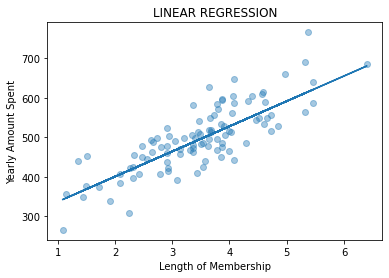

In [219]:
# test set에서 예측 
y_test_predict = model.predict(sm.add_constant(x_test))

# scatterplot: 실제 test 데이터
# line: train data에서 얻은 모델을 이용한 예측값


plt.scatter(x_test,y_test, alpha = 0.4)
plt.plot(x_test, y_test_predict)
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.title("LINEAR REGRESSION")
plt.show()